In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sb

# Zadanie 1

In [2]:
def autokow(X_t, h):
    n = len(X_t)
    mu = np.mean(X_t)
    suma = 0
    for i in range(n-abs(h)):
        suma += (X_t[i]-mu)*(X_t[i+abs(h)] - mu)
    return 1/n*suma

def autokor(X_t ,h):
    return autokow(X_t,h)/autokow(X_t,0)

def kowariancja(h):
    if h==0:
        return 4
    else:
        return 0
    
def korelacja(h):
    if h==0:
        return 1
    else:
        return 0
    
def kow_error(h_max,n):
    X_t = np.random.normal(loc=0, scale=2, size=n)
    h_val = np.arange(0, h_max+1, 1)
    kow_array_ep = np.zeros(h_max)
    kow_array_teo = np.zeros(h_max)
    for i in range(h_max):
        kow_array_ep[i] = autokow(X_t, h_val[i])
        kow_array_teo[i] = kowariancja(h_val[i])
    return np.sum(np.abs(kow_array_ep-kow_array_teo))

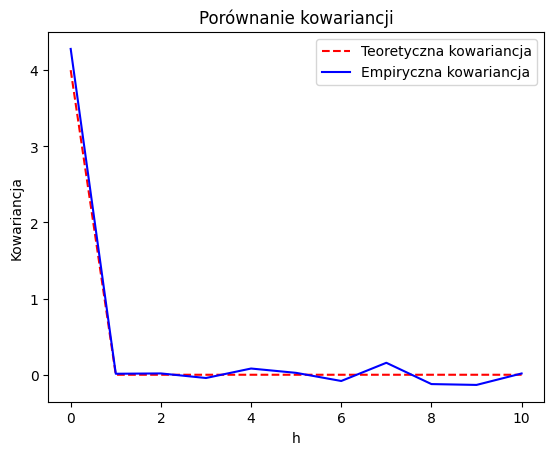

In [3]:
n = 1000
h_max = 10
h_val = np.arange(0, h_max + 1, 1)
x_t = np.random.normal(loc=0, scale=2, size=n)

teo_kow = np.zeros(len(h_val))
teo_kor = np.zeros(len(h_val))
emp_kow = np.zeros(len(h_val))
emp_kor = np.zeros(len(h_val))
 
for i in range(len(h_val)):
    h = h_val[i]
 
    teo_kow[i] = kowariancja(h)
    teo_kor[i] = korelacja(h)
 
    emp_kow[i] = autokow(x_t, h)
    emp_kor[i] = autokor(x_t, h)
 
plt.plot(h_val, teo_kow, 'r--', label='Teoretyczna kowariancja')
plt.plot(h_val, emp_kow, 'b-', label='Empiryczna kowariancja')
plt.xlabel('h')
plt.ylabel('Kowariancja')
plt.title('Porównanie kowariancji')
plt.legend()
 

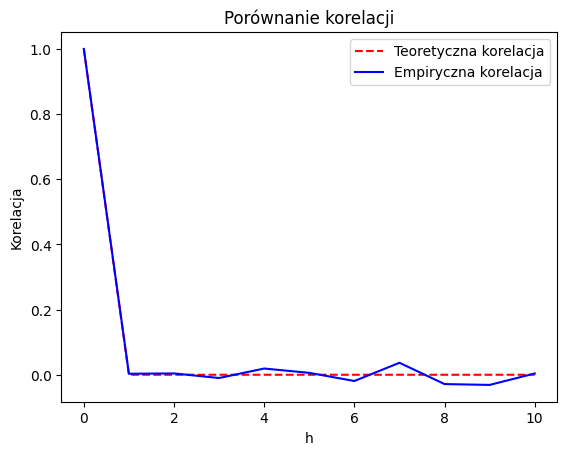

In [4]:

plt.plot(h_val, teo_kor, 'r--', label='Teoretyczna korelacja')
plt.plot(h_val, emp_kor, 'b-', label='Empiryczna korelacja')
plt.xlabel('h')
plt.ylabel('Korelacja')
plt.title('Porównanie korelacji')
plt.legend()
 
plt.show()

In [5]:
n=1000
n_vals = np.arange(10,n+10,10)
errors = np.zeros(len(n_vals))
for i in range(len(errors)):
    errors[i] = kow_error(h_max,n_vals[i])


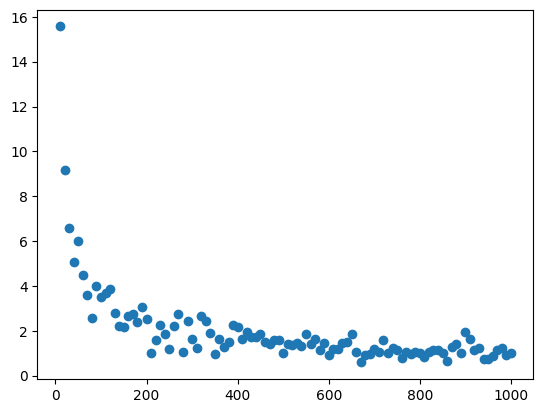

In [6]:
plt.scatter(n_vals,errors)

In [7]:
n=100
M= 100
n_vals = np.arange(10,n+10,10)
print(len(n_vals))
errors_advanced = np.zeros((M,len(n_vals)))
for i in range(M):
    for j in range(len(n_vals)):
        errors_advanced[i,j] = kow_error(h_max,n_vals[j])

10


{'whiskers': [<matplotlib.lines.Line2D at 0x204d93670e0>,
 'caps': [<matplotlib.lines.Line2D at 0x204d9367590>,
 'boxes': [<matplotlib.lines.Line2D at 0x204d9366ed0>,
 'medians': [<matplotlib.lines.Line2D at 0x204d9367b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x204d9367dd0>,
 'means': []}

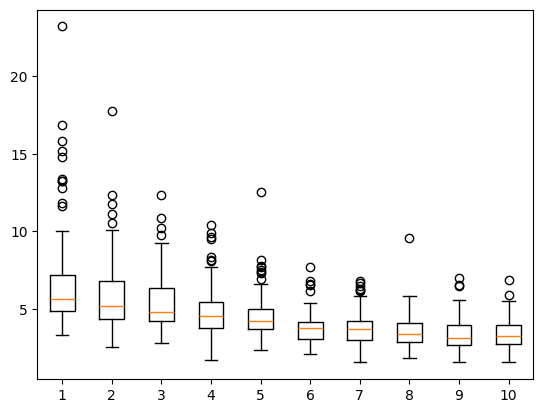

In [8]:
plt.boxplot(errors_advanced)

# Zadanie 4


In [9]:
def teo_kowar(h,sigma,teta):
    if h == 0:
        return (sigma**2)*(1+ teta**2)
    elif h== 1 or h == -1:
        return teta*sigma**2
    else:
        return 0
    
def teo_korel(h,teta):
    if h == 0 :
        return 1
    elif h == 1 or h == -1:
        return teta/(1+teta**2)
    else:
        return 0
    

In [10]:
teta = -2
sigma = 2
n = 1000
h_vals = np.arange(0,11,1)
Z_t = np.random.normal(0,sigma,n)
X_t = Z_t[1:] + teta*Z_t[:n-1]
emp_kowals = np.zeros(len(h_vals))
emp_korels = np.zeros(len(h_vals))
teo_kowals = np.zeros(len(h_vals))
teo_korels = np.zeros(len(h_vals))

for i in range(len(h_vals)):
    emp_kowals[i] = autokow(X_t,h_vals[i])
    emp_korels[i] = autokor(X_t,h_vals[i])
    teo_kowals[i] = teo_kowar(h_vals[i],sigma,teta)
    teo_korels[i] = teo_korel(h_vals[i],teta)

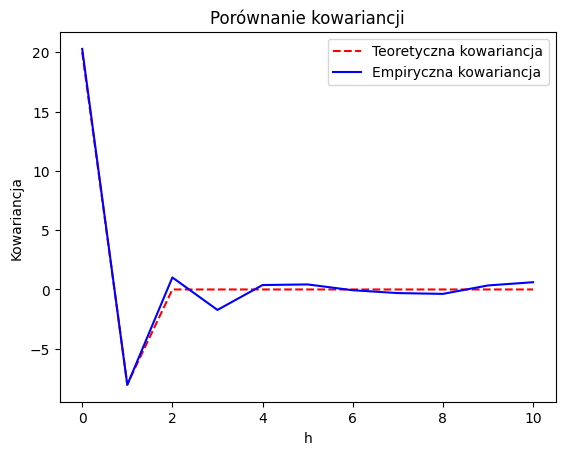

In [11]:
plt.plot(h_vals, teo_kowals, 'r--', label='Teoretyczna kowariancja')
plt.plot(h_vals, emp_kowals, 'b-', label='Empiryczna kowariancja')
plt.xlabel('h')
plt.ylabel('Kowariancja')
plt.title('Porównanie kowariancji')
plt.legend()
 
plt.show()

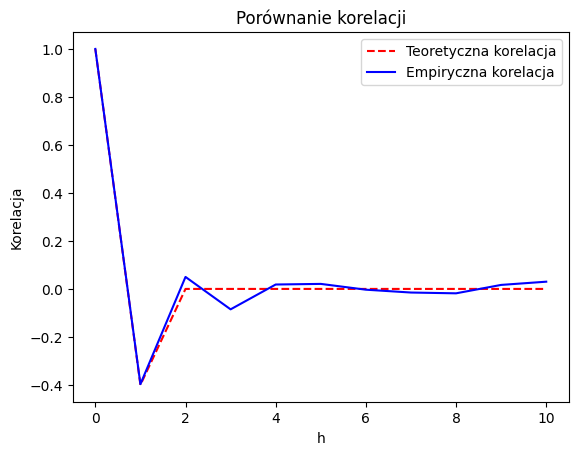

In [12]:
plt.plot(h_vals, teo_korels, 'r--', label='Teoretyczna korelacja')
plt.plot(h_vals, emp_korels, 'b-', label='Empiryczna korelacja')
plt.xlabel('h')
plt.ylabel('Korelacja')
plt.title('Porównanie korelacji')
plt.legend()
 
plt.show()

# Zadanie 5


In [13]:
def wn(a,p,n):
    return np.random.choice([a,-a,0],size=n, p=[p/2,p/2,1-p])

def resistant_emp_autokor(X_t,h):
    return np.sin((np.pi/2) * (1/(n-h)) * np.sum( np.sign((X_t[:n-h] - np.median(X_t))*(X_t[h:] - np.median(X_t)))))

In [14]:
#estymator klasyczny - zdefiniowany wyżej

n = 5000
sigma = 1
teta = 2
p=0.05
a=20
h_vals = np.arange(0,11,1)

Z_t = np.random.normal(0,sigma,n+1)
Y_t = Z_t[1:] + teta*Z_t[:n]
zeta_t = wn(a,p,n)
X_t = Y_t + zeta_t

clasic_est = np.zeros(len(h_vals))
resistant_est = np.zeros(len(h_vals))
teo_est = np.zeros(len(h_vals))
for i in range(len(h_vals)):
    clasic_est[i] =  autokor(Y_t,h_vals[i])
    resistant_est[i] =  resistant_emp_autokor(Y_t,h_vals[i])
    teo_est[i] =  teo_korel(h_vals[i],teta)
    


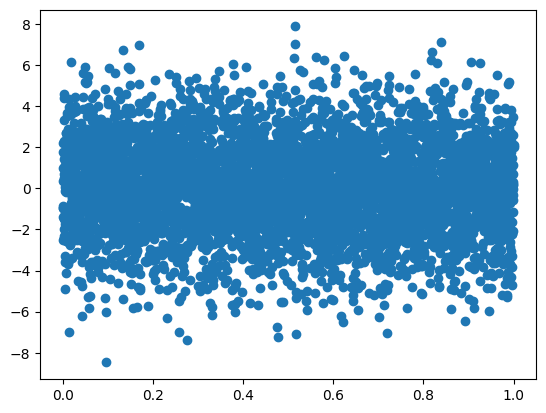

In [15]:
plt.scatter(np.linspace(0,1,len(Y_t)),Y_t)


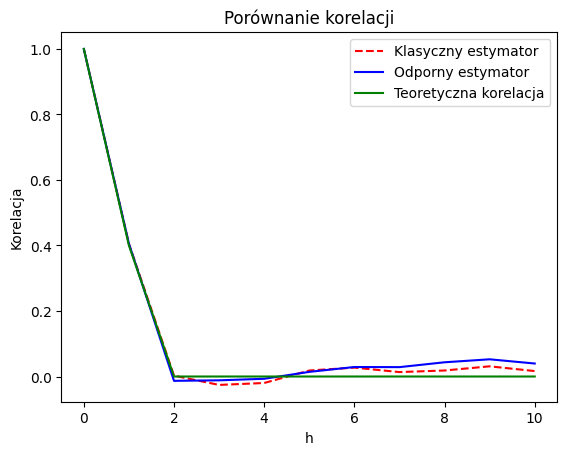

In [16]:
plt.plot(h_vals, clasic_est, 'r--', label='Klasyczny estymator')
plt.plot(h_vals, resistant_est, 'b-', label='Odporny estymator')
plt.plot(h_vals, teo_est, 'g-', label='Teoretyczna korelacja')
plt.xlabel('h')
plt.ylabel('Korelacja')
plt.title('Porównanie korelacji')
plt.legend()
 
plt.show()

In [17]:
clasic_est = np.zeros(len(h_vals))
resistant_est = np.zeros(len(h_vals))
teo_est = np.zeros(len(h_vals))
for i in range(len(h_vals)):
    clasic_est[i] =  autokor(X_t,h_vals[i])
    resistant_est[i] =  resistant_emp_autokor(X_t,h_vals[i])
    teo_est[i] =  teo_korel(h_vals[i],teta)

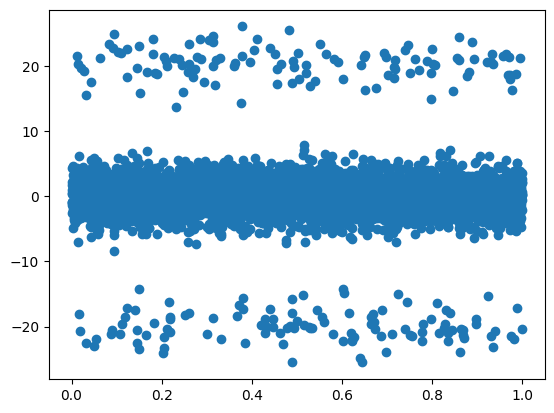

In [18]:
plt.scatter(np.linspace(0,1,len(X_t)),X_t)

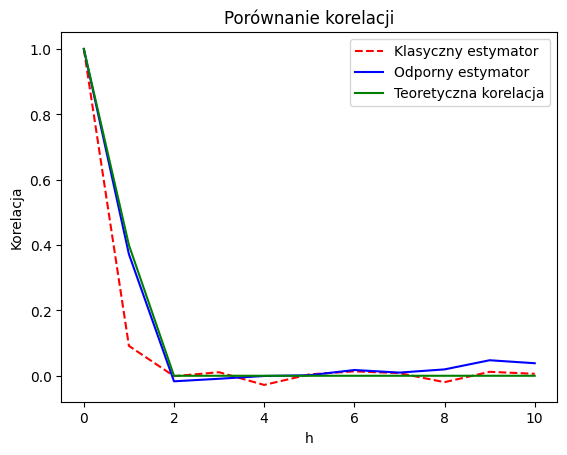

In [19]:
plt.plot(h_vals, clasic_est, 'r--', label='Klasyczny estymator')
plt.plot(h_vals, resistant_est, 'b-', label='Odporny estymator')
plt.plot(h_vals, teo_est, 'g-', label='Teoretyczna korelacja')
plt.xlabel('h')
plt.ylabel('Korelacja')
plt.title('Porównanie korelacji')
plt.legend()
 
plt.show()

In [20]:
def e_1(h,sigma,teta,a,p,n,M):
    errors = np.zeros(M)
    for i in range(M):
        Z_t = np.random.normal(0,sigma,n+1)
        Y_t = Z_t[1:] + teta*Z_t[:n]
        zeta_t = wn(a,p,n)
        X_t = Y_t + zeta_t
        errors[i] = abs(autokor(X_t,h) - teo_korel(h,teta))
    return (1/M) * np.sum(errors) 


def e_2(h,sigma,teta,a,p,n,M):
    errors = np.zeros(M)
    for i in range(M):
        Z_t = np.random.normal(0,sigma,n+1)
        Y_t = Z_t[1:] + teta*Z_t[:n]
        zeta_t = wn(a,p,n)
        X_t = Y_t + zeta_t
        errors[i] = abs(resistant_emp_autokor(X_t,h) - teo_korel(h,teta))
    return (1/M) * np.sum(errors) 

In [21]:
    # clasic_est[i] =  autokor(X_t,h_vals[i])
    # resistant_est[i] =  resistant_emp_autokor(X_t,h_vals[i])
    # teo_est[i] =  teo_korel(h_vals[i],teta)

In [22]:
n = 1000
M = 100
h = 1
teta = 2
sigma = 0.5
a = np.arange(1,11,1)
p = np.arange(0.01,0.16,0.01)


e_1_matrix = np.zeros((len(a),len(p)))
e_2_matrix = np.zeros((len(a),len(p)))

for i in range(len(a)):
    for j in range(len(p)):
        e_1_matrix[i,j] = e_1(h,sigma,teta,a[i],p[j],n,M)
        e_2_matrix[i,j] = e_2(h,sigma,teta,a[i],p[j],n,M)

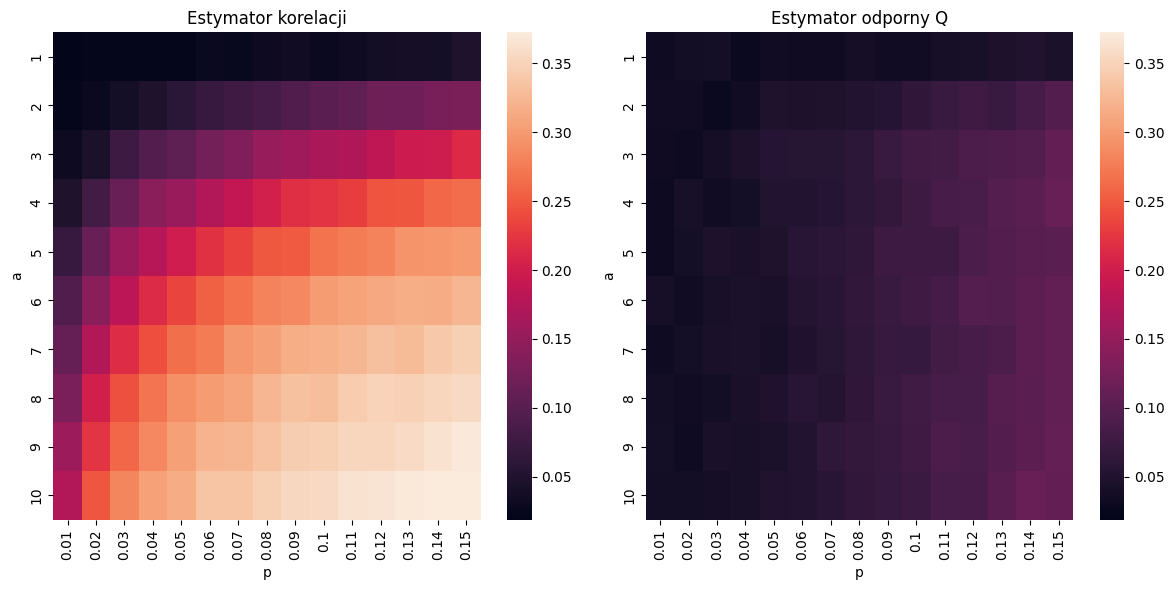

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
vmin = min(e_1_matrix.min(), e_2_matrix.min())
vmax = max(e_1_matrix.max(), e_2_matrix.max())

sb.heatmap(e_1_matrix, ax=axes[0], vmin = vmin, vmax = vmax,xticklabels=np.round(p,3),yticklabels=a)
axes[0].set_title("Estymator korelacji")
axes[0].set_xlabel("p")
axes[0].set_ylabel("a")


sb.heatmap(e_2_matrix, ax=axes[1], vmin = vmin, vmax = vmax,xticklabels=np.round(p,3),yticklabels=a)
axes[1].set_title("Estymator odporny Q")
axes[1].set_xlabel("p")
axes[1].set_ylabel("a")

plt.tight_layout()

plt.show()

# 